In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Boston-house-price-data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.rename(columns={'MEDV':'PRICE'},inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Text(0, 0.5, 'LSTAT')

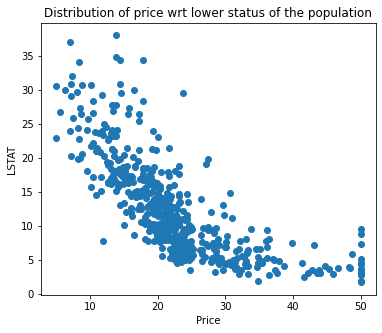

In [7]:
plt.figure(figsize=(6,5))
plt.scatter(df.PRICE,df.LSTAT)
plt.title('Distribution of price wrt lower status of the population')
plt.xlabel('Price')
plt.ylabel('LSTAT')

Text(0.5, 0, 'Price')

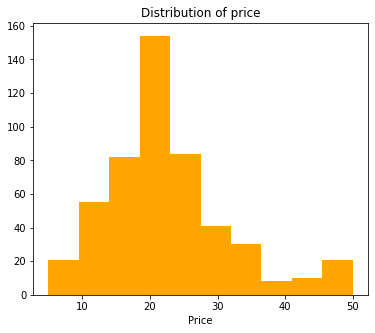

In [8]:
plt.figure(figsize=(6,5))
plt.hist('PRICE',data=df,bins=10,color='orange')
plt.title('Distribution of price')
plt.xlabel('Price')

C:\Users\Jocelyn\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Price')

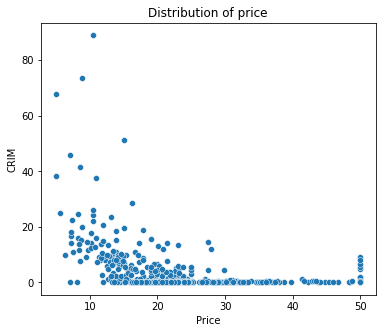

In [9]:
plt.figure(figsize=(6,5))
sns.scatterplot('PRICE','CRIM',data=df)
plt.title('Distribution of price')
plt.xlabel('Price')

C:\Users\Jocelyn\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of price wrt crime rate in the region')

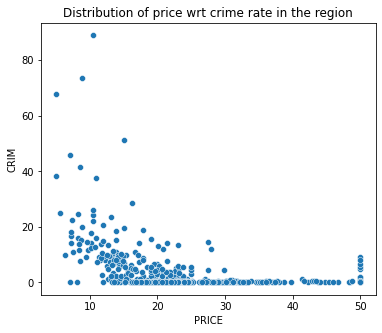

In [10]:
plt.figure(figsize=(6,5))
sns.scatterplot('PRICE','CRIM',data=df)
plt.title('Distribution of price wrt crime rate in the region')

C:\Users\Jocelyn\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of price and pupil teacher ratio wrt room availabiltiy in the region')

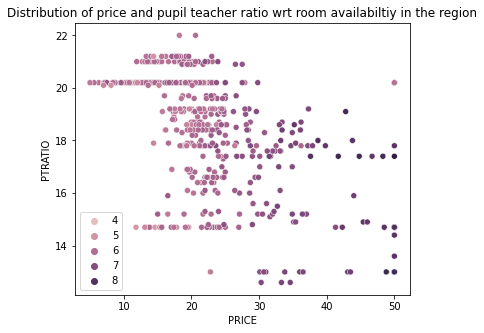

In [11]:
plt.figure(figsize=(6,5))
sns.scatterplot('PRICE','PTRATIO',hue='RM',data=df)
plt.legend(loc='best')
plt.title('Distribution of price and pupil teacher ratio wrt room availabiltiy in the region')

In [12]:
x=df.drop('PRICE',axis=1)
y=df['PRICE']

In [13]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [14]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

<AxesSubplot:>

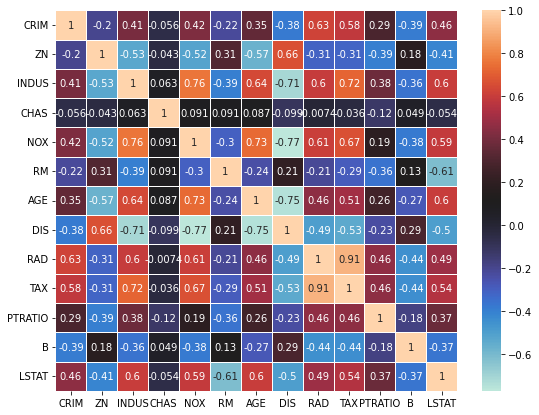

In [15]:
plt.figure(figsize=(9,7))
sns.heatmap(x.corr(),annot=True,linewidth=True,cmap='icefire')

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf= RandomForestRegressor(criterion='mae',n_jobs=-1, n_estimators=10,max_depth=6, min_samples_leaf=1, random_state=3)
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=6, n_estimators=10, n_jobs=-1,
                      random_state=3)

In [19]:
y_pred=rf.predict(x_test)

In [20]:
y_pred

array([21.175, 44.065, 19.29 , 24.14 , 21.545, 21.555, 15.35 , 12.315,
       17.085, 16.5  , 24.535, 19.845, 14.685, 20.525, 21.91 , 33.94 ,
       42.78 , 19.425, 11.93 , 23.005, 18.565, 24.03 , 12.785, 20.365,
        9.165, 18.43 , 16.24 , 21.72 , 23.45 , 21.095, 22.995, 23.39 ,
       35.19 , 19.915, 22.465, 32.52 , 18.46 , 12.495, 22.255, 19.485,
       34.27 , 23.865, 20.355, 23.45 , 16.115, 20.395, 23.39 , 21.625,
       20.075, 14.25 , 19.37 , 14.905, 10.87 , 24.215,  8.255, 15.165,
       17.32 , 10.61 , 18.45 , 11.52 , 19.545, 32.19 , 20.395, 32.305,
       19.425, 20.97 , 20.54 , 18.755,  8.255, 13.745, 19.625, 17.315,
       28.32 , 10.775, 15.045, 18.22 , 13.96 , 39.915, 27.3  , 20.025,
       19.725, 19.46 , 22.185, 20.525, 24.01 , 15.81 , 24.595, 20.89 ,
       22.57 , 20.865, 20.435, 14.39 ,  8.985, 11.765, 33.36 , 25.645,
       23.765, 27.25 , 24.79 , 15.055, 19.955, 22.115])

In [21]:
y_pred=y_pred.reshape(-1,1)   #I did this because, i was getting an error to reshape it, (-1,1) is done for single feature/column and (1,-1) is done for multi feature/column

In [22]:
y_pred

array([[21.175],
       [44.065],
       [19.29 ],
       [24.14 ],
       [21.545],
       [21.555],
       [15.35 ],
       [12.315],
       [17.085],
       [16.5  ],
       [24.535],
       [19.845],
       [14.685],
       [20.525],
       [21.91 ],
       [33.94 ],
       [42.78 ],
       [19.425],
       [11.93 ],
       [23.005],
       [18.565],
       [24.03 ],
       [12.785],
       [20.365],
       [ 9.165],
       [18.43 ],
       [16.24 ],
       [21.72 ],
       [23.45 ],
       [21.095],
       [22.995],
       [23.39 ],
       [35.19 ],
       [19.915],
       [22.465],
       [32.52 ],
       [18.46 ],
       [12.495],
       [22.255],
       [19.485],
       [34.27 ],
       [23.865],
       [20.355],
       [23.45 ],
       [16.115],
       [20.395],
       [23.39 ],
       [21.625],
       [20.075],
       [14.25 ],
       [19.37 ],
       [14.905],
       [10.87 ],
       [24.215],
       [ 8.255],
       [15.165],
       [17.32 ],
       [10.61 ],
       [18.45 

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Predicting R2 Score the Train set results
y_pred = rf.predict(x_train)
r2_score_rf_train = r2_score(y_train, y_pred)

# Predicting R2 Score the Test set results
y_pred_rf_test = rf.predict(x_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))

print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

R2_score (train):  0.9525515886555261
R2_score (test):  0.856644270760223
RMSE:  3.0325910667993754
